In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Генерація випадкового набору даних (1000 значень)
print(" Генерація випадкового набору даних")

# Задаємо параметри для генерації даних
N_SAMPLES = 1000  # Кількість зразків
N_FEATURES = 5    # Кількість ознак
NOISE_LEVEL = 10  # Рівень шуму

# Встановлюємо "зерно" для відтворюваності результату 
np.random.seed(33)

# 1. Генерація ознак (X)
X = np.random.rand(N_SAMPLES, N_FEATURES) * 10 

# 2. Створення "справжніх" коефіцієнтів (ваг) для лінійної моделі
true_weights = np.array([3.0, -1.5, 0.5, 2.0, 4.0])

# 3. Генерація цільової змінної (y)
noise = np.random.randn(N_SAMPLES) * NOISE_LEVEL
y = X.dot(true_weights) + noise

print("Генерація даних за допомогою Numpy завершена")
print(f"Масив ознак (X) має розмірність: {X.shape}")
print(f"Вектор цільової змінної (y) має розмірність: {y.shape}")
print(f"Діапазон значень X: від {X.min():.2f} до {X.max():.2f}")
print(f"Діапазон значень y: від {y.min():.2f} до {y.max():.2f}")

 Генерація випадкового набору даних
Генерація даних за допомогою Numpy завершена
Масив ознак (X) має розмірність: (1000, 5)
Вектор цільової змінної (y) має розмірність: (1000,)
Діапазон значень X: від 0.00 до 10.00
Діапазон значень y: від -17.28 до 99.79


In [13]:
#  Нормалізація значень
print("Нормалізація значень (Z-score)")

def normalize(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    std[std == 0] = 1
    return (X - mean) / std, mean, std

X_normalized, mean_X, std_X = normalize(X)

print("Нормалізація даних завершена")
print(f"До нормалізації:   середнє = {mean_X}, std = {std_X}")
print(f"Після нормалізації: середнє = {X_normalized.mean():.4f}, std = {X_normalized.std():.4f}")

Нормалізація значень (Z-score)
Нормалізація даних завершена
До нормалізації:   середнє = [5.11706575 5.05569798 4.98247298 5.0197646  4.88482902], std = [2.8855248  2.86929357 2.89134861 2.83958163 2.91567357]
Після нормалізації: середнє = 0.0000, std = 1.0000


In [14]:
# Розділення на навчальну та тестову вибірки
print("Розділення на навчальну та тестову вибірки")

TEST_SIZE = 0.3

# Перемішуємо індекси для випадкового розділення
N = len(X_normalized)
indices = np.arange(N)
np.random.seed(33)
np.random.shuffle(indices)

# Розраховуємо індекс, до якого йде навчальна вибірка
train_end_idx = int((1 - TEST_SIZE) * N)

# Розділяємо індекси
train_indices = indices[:train_end_idx]
test_indices = indices[train_end_idx:]

# Розділяємо дані X та y
X_train = X_normalized[train_indices]
y_train = y[train_indices]

X_test = X_normalized[test_indices]
y_test = y[test_indices]

print(f"Навчальна вибірка: {X_train.shape[0]} зразків")
print(f"Тестова вибірка: {X_test.shape[0]} зразків")

Розділення на навчальну та тестову вибірки
Навчальна вибірка: 700 зразків
Тестова вибірка: 300 зразків


In [17]:
# Функція для обчислення Евклідової відстані між двома векторами
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))
    
print("Функція Евклідової відстані реалізована")

Функція Евклідової відстані реалізована


In [18]:
# Функція, яка повертає індекси K найближчих сусідів
def get_neighbors(X_train, y_train, test_point, k):
    distances = []
    
    # Ітеруємо по кожній точці в навчальній вибірці
    for i in range(len(X_train)):
        train_point = X_train[i]
        
        # Обчислюємо відстань
        dist = euclidean_distance(test_point, train_point)
        
        # Зберігаємо відстань та індекс точки
        distances.append((dist, i))
    
    # Сортуємо за відстанню
    distances.sort(key=lambda x: x[0])
    
    # Отримуємо індекси K найближчих сусідів
    neighbor_indices = [item[1] for item in distances[:k]]
    
    # Повертаємо цільові значення (y) для цих сусідів
    return y_train[neighbor_indices]

print("Функція пошуку найближчих сусідів реалізована")

# Функція прогнозування для однієї точки
def predict_knn_regression(X_train, y_train, test_point, k):
    k_nearest_targets = get_neighbors(X_train, y_train, test_point, k)
    prediction = np.mean(k_nearest_targets)
    return prediction

# Функція для прогнозування всієї тестової вибірки
def test_model(X_train, y_train, X_test, k):
    predictions = [
        predict_knn_regression(X_train, y_train, test_point, k)
        for test_point in X_test
    ]
    return np.array(predictions)

print("Функції KNN-регресора реалізовані")

Функція пошуку найближчих сусідів реалізована
Функції KNN-регресора реалізовані


In [26]:
# Навчання KNN-регресора з різними значеннями K
print("Навчання KNN-регресора з різними значеннями K")

# Функція для обчислення Середньої Квадратичної Помилки (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Діапазон значень K для тестування
K_values = range(1, 23)
results = {}

print("Початок навчання моделей...")
print("\nРезультати навчання для різних K:")
print("-" * 30)
print(" K |   MSE   ")
print("-" * 30)

for k in K_values:
    # Прогноз на тестовій вибірці для поточного K
    y_pred = test_model(X_train, y_train, X_test, k)
    
    # Обчислення MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Зберігаємо результат
    results[k] = mse
    
    print(f"{k:2d} | {mse:7.2f}")

# Вибір оптимального K
best_k = min(results, key=results.get)
best_mse = results[best_k]

print("-" * 30)
print(f"Навчання завершено для K від 1 до {max(K_values)}")

# Вибір оптимального значення K
print("Вибір оптимального значення K")

print("Аналіз якості моделей завершено")
print(f"\n--- Результати вибору оптимального K ---")
print(f"Найкраще значення K: {best_k}")
print(f"Найкращий MSE на тестовій вибірці: {best_mse:.2f}")

Навчання KNN-регресора з різними значеннями K
Початок навчання моделей...

Результати навчання для різних K:
------------------------------
 K |   MSE   
------------------------------
 1 |  225.10
 2 |  192.82
 3 |  158.75
 4 |  151.34
 5 |  140.35
 6 |  139.77
 7 |  139.62
 8 |  138.64
 9 |  138.61
10 |  135.45
11 |  134.16
12 |  131.50
13 |  132.53
14 |  132.93
15 |  132.52
16 |  132.15
17 |  130.84
18 |  132.13
19 |  131.04
20 |  129.92
21 |  131.32
22 |  131.71
------------------------------
Навчання завершено для K від 1 до 22
Вибір оптимального значення K
Аналіз якості моделей завершено

--- Результати вибору оптимального K ---
Найкраще значення K: 20
Найкращий MSE на тестовій вибірці: 129.92


Візуалізація залежності MSE від K
Побудова графіка


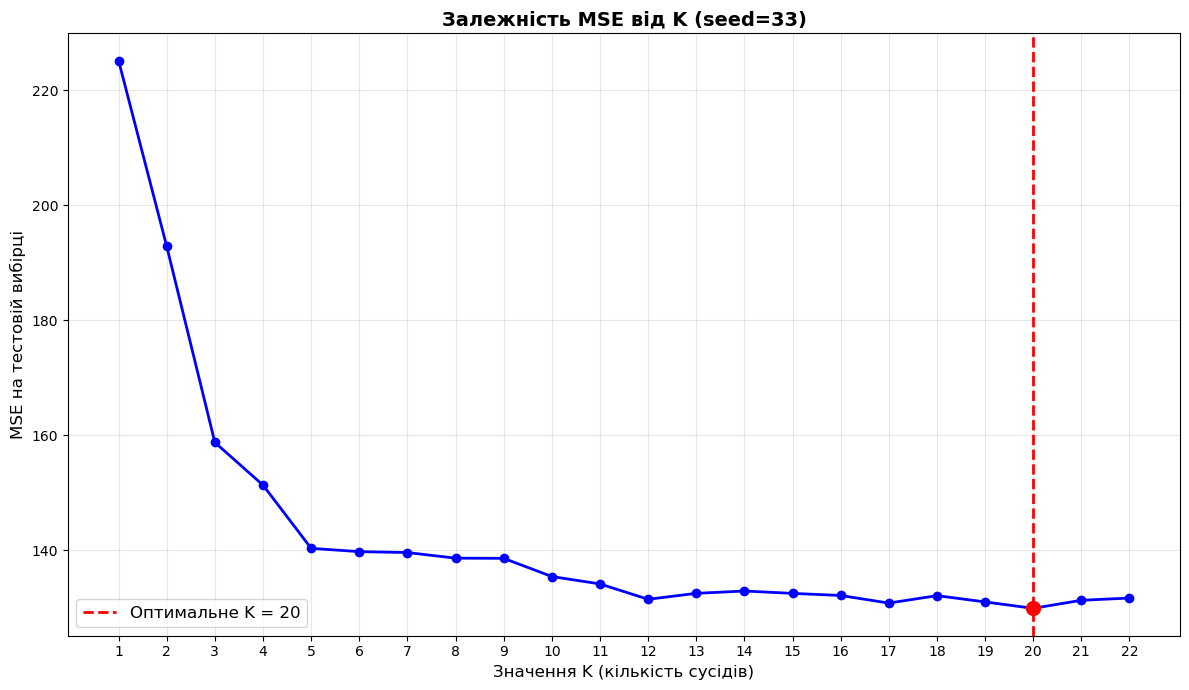

In [27]:
#  Візуалізація залежності MSE від K
print("Візуалізація залежності MSE від K")

print("Побудова графіка")

# Підготовка даних для візуалізації
k_list = list(results.keys())
mse_list = list(results.values())

plt.figure(figsize=(12, 7))
plt.plot(k_list, mse_list, marker='o', linestyle='-', color='b', linewidth=2, markersize=6)

# Позначення найкращого K
plt.axvline(x=best_k, color='r', linestyle='--', linewidth=2, label=f'Оптимальне K = {best_k}')
plt.scatter(best_k, best_mse, color='red', s=100, zorder=5)

plt.title('Залежність MSE від K (seed=33)', fontsize=14, fontweight='bold')
plt.xlabel('Значення K (кількість сусідів)', fontsize=12)
plt.ylabel('MSE на тестовій вибірці', fontsize=12)
plt.xticks(k_list)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()